<a target="_blank" href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/05%20-%20Clustering/walkthrough/walkthrough_05.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Clustering

**Goal**: Learn how to use K-means and Hierarchial clustering.

In [15]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

import seaborn as sns
sns.set_style("darkgrid")

#The Dataset
The dataset we're going to use in this walkthrough is the Iris one, which contains measurement for 3 different types of iris flowers: setosa, versicolor, and virginica.</br>

<img src='https://machinelearninghd.com/wp-content/uploads/2021/03/iris-dataset.png' width="500">


Data included for each Iris flower: width and length of sepals and petals. We will use clustering on this data to try to group flowers by the three different types.

This dataset is provided in the `sklearn` library and is well known.


 

In [2]:
iris = datasets.load_iris()

In [3]:
print("The different types of irises are:", iris.target_names)
print("They are encoded as:", iris.target)

The different types of irises are: ['setosa' 'versicolor' 'virginica']
They are encoded as: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


As you can see, the **iris** dataset is saved as a set of numpy arrays.<br>

We're going to transform it into a `pandas dataframe`.</br>
**Note:** We could have used the numpy array format as well for the k-means Clustering.


In [4]:
# note that X only includes data about the flowers, NOT including the actual labels (0, 1 or 2)
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We have 4 different metrics stored in X. To make for a clearer demonstration, let's for now only keep two of them: `sepal lenght` and `sepal width` and sore it as X_sepal. We'll come back to X the full set of features later on.

In [5]:
X_sepal = X.iloc[:, [0,1]]
X_sepal.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Below we save the labels, which indicate for each flower of which kind it is.

In [6]:
y=pd.DataFrame(iris.target, columns=["Flower_type"])
y.head()

,Flower_type
0,0
1,0
2,0
3,0
4,0


To get a quick idea we can see with the code below we have 50 samples of each flower type.

In [7]:
y.value_counts()

Flower_type
0              50
1              50
2              50
dtype: int64

The code below can give us an idea of how the X_sepal features vary depending on the flower label.

In [8]:
pd.concat([X_sepal, y], axis=1).groupby(['Flower_type']).describe().loc[:,(slice(None),['max','min','mean'])].transpose().sort_index()

Flower_type                 0      1      2
sepal length (cm) max   5.800  7.000  7.900
                  mean  5.006  5.936  6.588
                  min   4.300  4.900  4.900
sepal width (cm)  max   4.400  3.400  3.800
                  mean  3.428  2.770  2.974
                  min   2.300  2.000  2.200

And this is the order in which the labels appear in the iris dataset.

In [9]:
y['Flower_type'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##K-Means
We're going to use the K-Means provided by the `sklearn` library.<br>
For illustration, we're going to do two KMeans and fit it on X_sepal:

*   K-means with **3 clusters**
*   K-means with **5 clusters**

The one with **5 clusters** is only for illustration, because we know already that there are only 3 different types of iris in the dataset.




In [10]:
# create an instace of KMeans and specify the number of clusters=3, 
# the random state help make sure we all have exactly the same results
model3=KMeans(n_clusters=3, random_state=0) #3 clusters

# fit the model on the set of features we previously labelled as X_sepal (NOT including the labels on the type of flowers)
model3.fit(X_sepal)

KMeans(n_clusters=3, random_state=0)

In [11]:
# these are the labels returned by the model with 3 clusters
print(model3.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Now the model with 5 clusters.

In [12]:
# create an instance of KMeans
model5=KMeans(n_clusters=5, random_state=0) #5 clusters

# fit the model on the X features
model5.fit(X_sepal)

KMeans(n_clusters=5, random_state=0)

In [13]:
print(model5.labels_)

[4 0 0 0 4 4 0 4 0 0 4 4 0 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 0 0 4 4 4 0 0 4
 4 0 4 4 0 0 4 4 0 4 0 4 4 3 3 3 1 3 1 3 0 3 0 0 1 1 1 1 3 1 1 1 1 1 1 1 1
 3 3 3 3 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 0 1 1 1 1 0 1 3 1 2 3 3 2 0 2 3 2 3
 3 3 1 1 3 3 2 2 1 3 1 2 1 3 2 1 1 3 2 2 2 3 3 1 2 3 3 1 3 3 3 1 3 3 3 1 3
 3 1]


###Graphical Representation
The output (labels) of the K-means can easily be plotted in a 2D representation.<br>
Below, you can find the scatter plot according to `"sepal length (cm)"` by `"sepal width (cm)"`, our X_sepal.

Text(0.5, 1.0, 'Raw data with the original labels from the dataset')

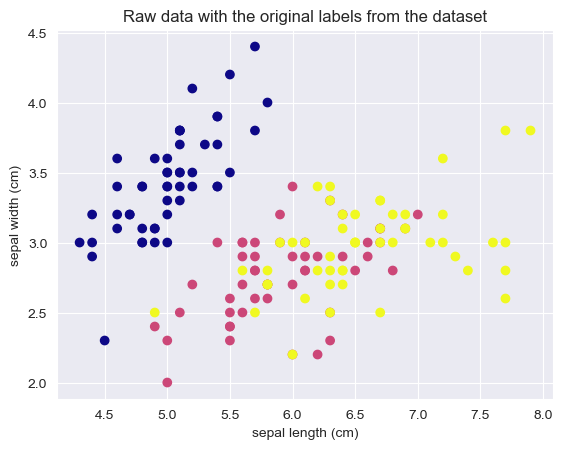

In [16]:
plt.scatter(X_sepal["sepal length (cm)"], X_sepal["sepal width (cm)"], c=y['Flower_type'], cmap='plasma') # points colored by the different flower types
plt.xlabel(X_sepal.columns[0])
plt.ylabel(X_sepal.columns[1])
plt.title("Raw data with the original labels from the dataset")

Below we visualize how **K-means** performs for the different numbers of clusters.

In [17]:
# this is how we access the cluster centers generated by our 3-cluser KMeans model
model3.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

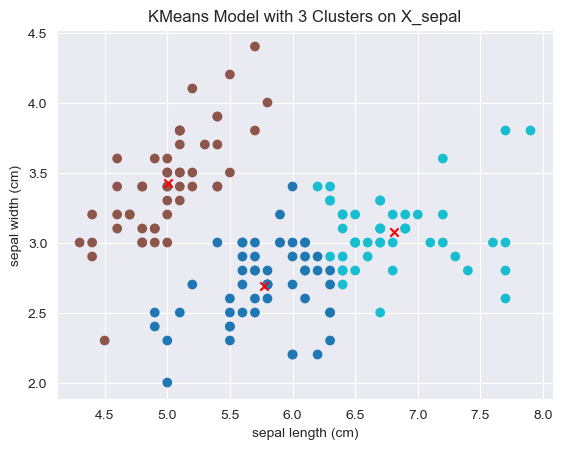

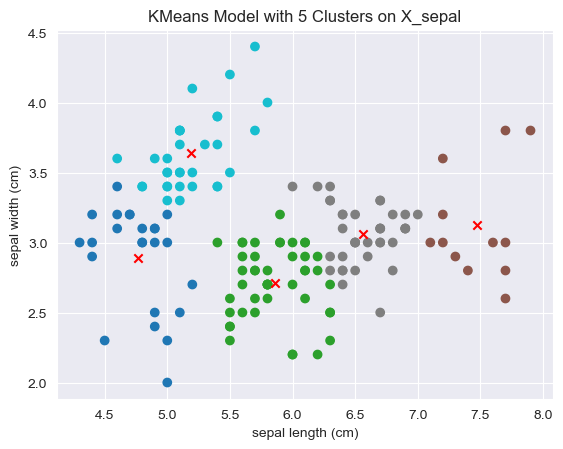

In [18]:
plt.scatter(X_sepal["sepal length (cm)"], X_sepal["sepal width (cm)"], c=model3.labels_, cmap='tab10')
plt.scatter(model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1], c="red", marker='x')
plt.xlabel(X_sepal.columns[0])
plt.ylabel(X_sepal.columns[1])
plt.title("KMeans Model with 3 Clusters on X_sepal")
plt.show()

plt.scatter(X_sepal["sepal length (cm)"], X_sepal["sepal width (cm)"], c=model5.labels_, cmap='tab10')
plt.scatter(model5.cluster_centers_[:, 0], model5.cluster_centers_[:, 1], c="red", marker='x')
plt.xlabel(X_sepal.columns[0])
plt.ylabel(X_sepal.columns[1])
plt.title("KMeans Model with 5 Clusters on X_sepal")
plt.show()

So if we take our 3 cluster K-means, how accurate is it? To perform this we count the number of matches we have between the labels predicted by the model and the target.

However, we first need to reorder the encoding because it seems that the labels do not match.

| "True" Label | "Model" Label |
| :---: | :---: |
| 0 | 1 |
| 1 | 0 |
| 2 | 2 |

**Note:** Remember that in the general case we do not have the target variable (KMeans is an example of unsupervised learning), meaning that we cannot compute the accuracy (ratio of correct over total predictions). Therefore, other metrics like the inertia are used to evaluate the model.

In [19]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
model3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [21]:
# with the code below we transform 1 predictions into 0s, 2 predictions remain 2s, 0 predictions into 1s
pd.DataFrame(model3.labels_, columns=['Predictions']).Predictions.map({1:0, 2:2, 0:1}).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [22]:
reordered_target3= pd.DataFrame(model3.labels_, columns=['Predictions']).Predictions.map({1:0, 2:2, 0:1})
reordered_target3.head()

0    0
1    0
2    0
3    0
4    0
Name: Predictions, dtype: int64

In [20]:
# concatenate the reordered predictions and the original true targets we previously saved as y
comparison3 = pd.concat([reordered_target3, y], axis=1)

# create new column 'Match' which takes on 1 if predictions=flower type and 0 otherwise
comparison3.loc[comparison3['Predictions'] == comparison3['Flower_type'], 'Match'] = 1
comparison3.loc[comparison3['Predictions'] != comparison3['Flower_type'], 'Match'] = 0

comparison3.head()

,Predictions,Flower_type,Match
0,0,0,1.0
1,0,0,1.0
2,0,0,1.0
3,0,0,1.0
4,0,0,1.0


In [21]:
# how accurate are the k-means labels
comparison3.Match.sum()/comparison3.shape[0]

0.82

Let's now get back to our full set of features stored in X. We can't represent graphically the clusters on many dimensions, but we can run the model.

In [22]:
# create an instace of KMeans and specify the number of clusters=3, 
# the random state help make sure we all have exactly the same results
model3X=KMeans(n_clusters=3, random_state=0) #3 clusters

# fit the model on the set of features we previously labelled as X (NOT including the labels on the type of flowers)
model3X.fit(X)

# fix the predicted labels to match the true target labels
reordered_target3X= pd.DataFrame(model3X.labels_, columns=['Predictions']).Predictions.map({1:0, 2:2, 0:1})

# concatenate the reordered predictions and the original true targets we previously saved as y
comparison3X = pd.concat([reordered_target3X, y], axis=1)

# create new column 'Match' which takes on 1 if predictions=flower type and 0 otherwise
comparison3X.loc[comparison3X['Predictions'] == comparison3X['Flower_type'], 'Match'] = 1
comparison3X.loc[comparison3X['Predictions'] != comparison3X['Flower_type'], 'Match'] = 0

# how accurate are the k-means labels with the full set of features
comparison3X.Match.sum()/comparison3X.shape[0]

0.8933333333333333

##Elbow method
We will now apply the **K-means** algorithm to find the optimal number of clusters. For this, we will use **The Elbow Method** ([further reading](https://en.wikipedia.org/wiki/Elbow_method_(clustering))).  

This method consists in plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve (**inertia**) as the number of clusters to use. The intuition is that increasing the number of clusters will always improve the fit (explain more of the variation), since there are more parameters (more clusters). However, this will at some point result in **over-fitting**, with only minimal gains in the fit, which the elbow reflects. 

In the code below, using the KMeans module from sklearn, we will iteratively apply the K-means algorithm for different values of k, save the parameter `inertia_` (i.e sum of squared distances of samples to their closest cluster center). Then plot the inertia compared to the number of clusters. Knowing that the elbow method tells us to select the cluster when there is a significant change in inertia, find the possible elbow point (possible number of cluster).

How many clusters should you use now?

Text(0, 0.5, 'Inertia')

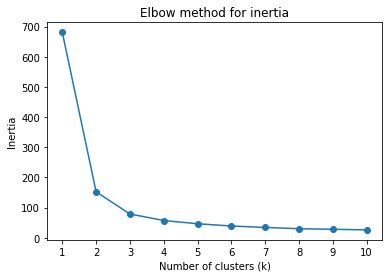

In [23]:
inertias = []
nbr_clusters = range(1,11)

for i in nbr_clusters:
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    inertias.append(km.inertia_)
    
plt.plot(nbr_clusters, inertias, '-o')
plt.xticks(np.arange(min(nbr_clusters), max(nbr_clusters)+1, 1.0))
plt.title('Elbow method for inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

## Hierarchial clustering
We're going to use the `AgglomerativeClustering` function provided by the `sklearn` library. This will help us do the hierarchial clustering<br>


In [77]:
from sklearn.cluster import AgglomerativeClustering

Below, we're going to create an instace and fit the model.

Please refer to this [documentation file](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) for learning more about the parameters the `AgglomerativeClustering` takes, for example:
- `affinity` is the type of distance metric used, can be Euclidean (default) but also Manhattan, Cosine
- `linkage` is the linkage crierion to use, can be ward (default) but also single, complete, average as seen in the lecture slides.

In [93]:
clustering3 = AgglomerativeClustering(n_clusters=3, affinity='Euclidean', linkage='average')
clustering3.fit(X)

AgglomerativeClustering(affinity='Euclidean', linkage='average', n_clusters=3)

Like before, we take a look at the "reponse" the model gave us and the original ones.

In [94]:
clustering3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [95]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

As we can see, again, the encoding of our Hierachical clustering is not the same as the original target.<br>
In order to compar them, we're going to reorder the `iris.target`.

| "True" label | "Model" label |
| :---: | :---: |
| 0 | 1 |
| 1 | 0 |
| 2 | 2 |

In [96]:
reordered_target= pd.DataFrame(clustering3.labels_, columns=['Predictions']).Predictions.map({1:0, 2:2, 0:1})
reordered_target.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Here we can see that the accuracy is slightly better than the one of the K-means. 

In [97]:
# concatenate the reordered predictions and the original true targets we previously saved as y
comparison = pd.concat([reordered_target, y], axis=1)

# create new column 'Match' which takes on 1 if predictions=flower type and 0 otherwise
comparison.loc[comparison['Predictions'] == comparison['Flower_type'], 'Match'] = 1
comparison.loc[comparison['Predictions'] != comparison['Flower_type'], 'Match'] = 0

# how accurate are the clustering labels
comparison.Match.sum()/comparison.shape[0]

0.9066666666666666

## Runtime of both Clustering Types
Here we want to see the computation time needed for the **Kmeans** and the **Hierarchial** clusterings.

For this we use `%%time` which will provide the computation time.



In [98]:
import time

In [99]:
start = time.time()
clustering3 = AgglomerativeClustering(n_clusters=3)
clustering3.fit(X)
end = time.time()
print('Time: ', round(end-start, 4))

Time:  0.0041


In [100]:
start = time.time()
model3=KMeans(n_clusters=3)
model3.fit(X)
end = time.time()
print('Time: ', round(end-start, 4))

Time:  0.0271


**Note:** This dataset is small (150 observations), which is why KMeans takes longer than hierarchical clustering. However, generally, hierarchical clustering takes much longer than KMeans, which you will experience in the exercise.

###Dendogram visualization

In this section, we're going to present a simple way to create a **Dendogram**.<br>
To do it, we're going to use the `scipy.cluster.hierarchy` library. In this library, we're going to use: 


*   `dendogram`: It allow us to plot the dendogram.
*   `linkage`: It allows us to specify the type of linkage between the cluster. 

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png' width="500">



In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage #hierarchical clustering

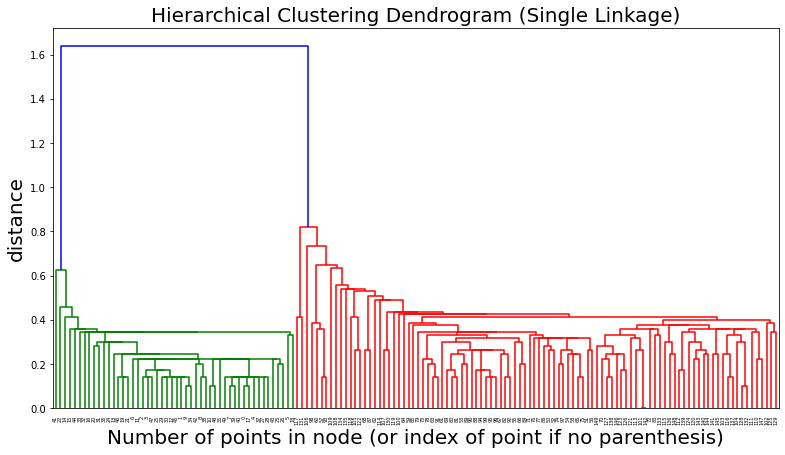

In [103]:
# Single linkage

plt.figure(figsize=(13, 7))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X, method='single', metric='euclidean') #Provide the linkage method we want and the chosen distance metric.
dendrogram(Z) #compute the dendogram according the linkage

plt.show()

###Exercise
Plot the 3 other types of linkages and look at what is changing.

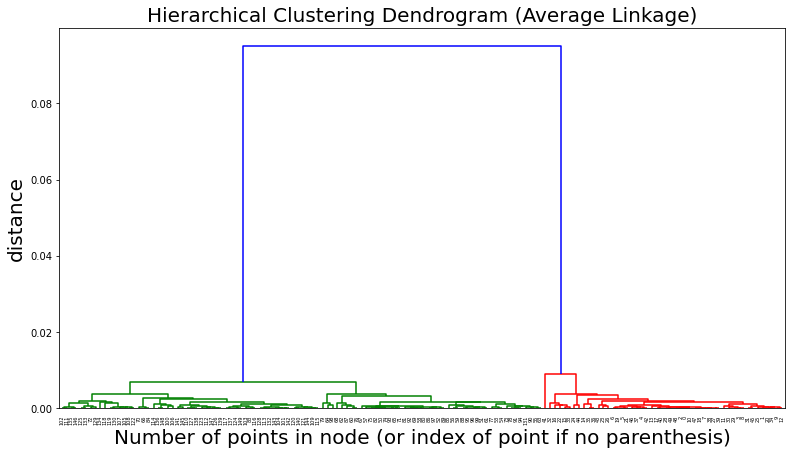

In [104]:
# Average linkage

plt.figure(figsize=(13, 7))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X, method='average', metric='cosine') #ADD YOUR CODE INSTEAD OF ...
dendrogram(Z)

plt.show()

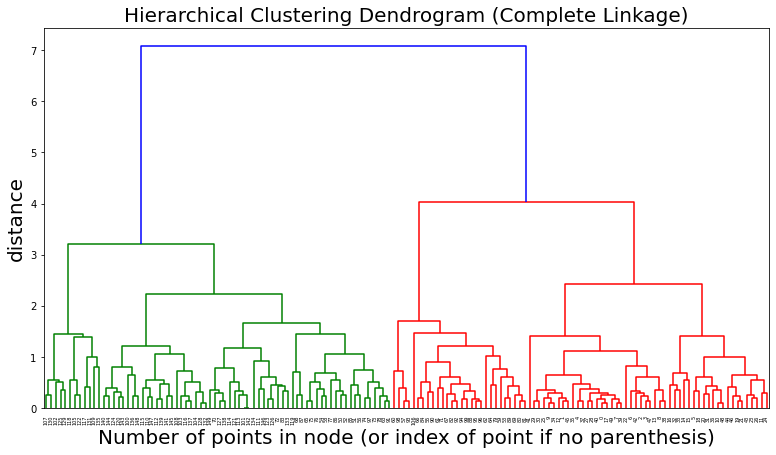

In [36]:
# Complete linkage

plt.figure(figsize=(13, 7))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X, method='complete') #ADD YOUR CODE INSTEAD OF ...
dendrogram(Z)

plt.show()

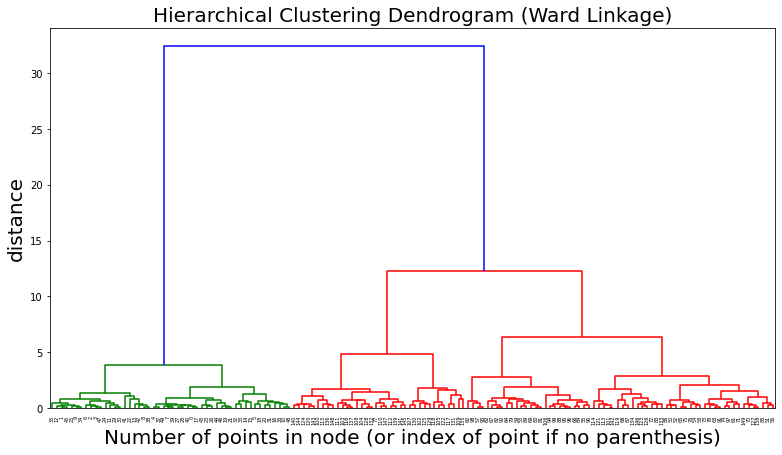

In [37]:
# Ward linkage

plt.figure(figsize=(13, 7))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X,method='ward') #ADD YOUR CODE INSTEAD OF ...
dendrogram(Z)

plt.show()